In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date


In [229]:
chantiers = pd.read_csv('chantiers-a-paris.csv', delimiter = ';') # do we want older or more recent data ?
chantiers_pertu = pd.read_csv('chantiers-perturbants.csv', delimiter = ';') # do we want older or more recent data ?
traffic = pd.read_csv('comptages-routiers-permanents.csv', delimiter = ';') # do we want older or more recent data ?
calendar = pd.read_csv('dimdate-QueryResult.csv', delimiter = ',') # do we want older or more recent data ?
vacations = pd.read_csv('fr-en-calendrier-scolaire.csv', delimiter = ';') # do we want older or more recent data ?
weather = pd.read_csv('donnees-synop-essentielles-omm.csv', delimiter = ';') # do we want older or more recent data ?
markets = pd.read_csv('marches-decouverts.csv', delimiter = ';') # do we want older or more recent data ?
events = pd.read_csv('que-faire-a-paris-.csv', delimiter = ';') # do we want older or more recent data ?
touristic_zones = pd.read_csv('zones-touristiques-internationales.csv', delimiter = ';') # do we want older or more recent data ?
weather_forecast = pd.read_csv('weather_forecast.csv', delimiter = ',') 


In [230]:
chantiers = chantiers[['Code postal arrondissement - Commune',
                                   'Date début du chantier', 
                                   'Date fin du chantier',
                                   'Synthèse - Nature du chantier',
                                   'Encombrement espace public',]]

chantiers_pertu = chantiers_pertu[["Code postal de l'arrondissement", 
                                                "Typologie",  
                                                'Objet', 
                                                'Voie(s)',  
                                                'Date de début', 
                                                'Date de fin', 
                                                'Impact sur la circulation', 
                                                'Niveau de perturbation',
                                                'Statut',]]

traffic = traffic.drop(columns=['geo_point_2d', 'geo_shape', 'Date debut dispo data', 'Date fin dispo data'])

calendar = calendar[['word_date', 
                     'date', 
                     'year', 
                     'quarter', 
                     'month',
                     'yearmonth', 
                     'day_of_month', 
                     'week', 
                     'day_of_week', 
                     'weekday',
                     'month_and_year', 
                     'holiday']]

vacations = vacations[['Description', 
                     'Population', 
                     'Date de début', 
                     'Date de fin',
                     'Académies', 
                     'Zones', 
                     'annee_scolaire']]

weather = weather[[ "Température (°C)", 
                   'Humidité',
                   'Nebulosité totale',
                   'Précipitations dans la dernière heure',
                    "Vitesse du vent moyen 10 mn",
                   "Date",]]#"Pression au niveau mer", 'Variation de pression en 24 heures', "Pression station", 'Précipitations dans les 24 dernières heures', 

markets = markets[["Identifiant marché",
                    'Produit',
                   'Arrondissement', 
                   'Jours de tenue', 
                   'LUNDI', 
                   'MARDI',
                   'MERCREDI', 
                   'JEUDI', 
                   'VENDREDI', 
                   'SAMEDI', 
                   'DIMANCHE', 
                   'Secteur',
                   'Heure début en semaine',
                   'Heure fin en semaine', 
                   'Heure début le samedi', 
                   'Heure fin le samedi',
                   'Heure début le dimanche', 
                   'Heure fin le dimanche']]


events = events[['Date de début',
                 'Date de fin',
                 'Occurrences',
                 'Mots clés',  
                 'Code postal']]

touristic_zones = touristic_zones[['name', 'type', '@timestamp']]

In [231]:
amont = traffic[traffic["Libelle noeud amont"].isin(['Av_Champs_Elysees-Washington', "Convention-Blomet", "Sts_Peres-Voltaire"])]
aval_amont = amont[amont["Libelle noeud aval"].isin(['Av_Champs_Elysees-Berri', "Lecourbe-Convention", "Sts_Peres-Universite"]) ]

In [232]:

aval_amont["timestamp"] = pd.to_datetime(aval_amont["Date et heure de comptage"], utc=True)
aval_amont["timestamp_short"] = aval_amont["timestamp"].dt.strftime('%Y-%m-%dT%H:%M')
aval_amont["date"] = aval_amont["timestamp"].dt.strftime('%Y-%m-%d')

C:\Users\guill\AppData\Local\Temp\ipykernel_21564\2760610762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["timestamp"] = pd.to_datetime(aval_amont["Date et heure de comptage"], utc=True)
C:\Users\guill\AppData\Local\Temp\ipykernel_21564\2760610762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["timestamp_short"] = aval_amont["timestamp"].dt.strftime('%Y-%m-%dT%H:%M')
C:\Users\guill\AppData\Local\Temp\ipykernel_21564\2760610762.py:3: SettingWithCopyWarning: 
A value is tryin

In [233]:
dict_arr = {"AV_Champs_Elysees": 75008, "Sts_Peres": 75007,  "Convention": 75015}
aval_amont["arrondissement"] = aval_amont['Libelle'].apply(lambda x: dict_arr[x])

C:\Users\guill\AppData\Local\Temp\ipykernel_21564\890006473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["arrondissement"] = aval_amont['Libelle'].apply(lambda x: dict_arr[x])


In [234]:
y = aval_amont[["Débit horaire"	, "Taux d'occupation",]]
X = aval_amont[["timestamp", "Libelle", "Identifiant arc", "arrondissement", "date"]]

# Holidays

In [235]:
calendar["date"] = pd.to_datetime(calendar["word_date"], utc=True)
calendar["date"] = calendar["date"].dt.strftime('%Y-%m-%d')

calendar["holiday"] = calendar["holiday"].apply(lambda x: None if x in ['MLK', 'USPRESIDENTS', 'VICTORIA', 'MEMORIAL',  'CANADA',
       'USINDEPENDENCE','THANKSGIVINGCANADA', 'VETERANS',  'VETERANSUSG'] else x)

calendar["is_holiday"] = calendar["holiday"].isna().apply(lambda x: 1 if x!=True else 0)

vacations["start_date"] = pd.to_datetime(vacations["Date de début"], utc=True)
vacations["start_date"] = vacations["start_date"].dt.strftime('%Y-%m-%d')

vacations["end_date"] = pd.to_datetime(vacations["Date de fin"], utc=True)
vacations["end_date"] = vacations["end_date"].dt.strftime('%Y-%m-%d')

vacations = vacations[["start_date", "end_date"]]

calendar['key'] = 0
vacations['key'] = 0

special_days =calendar.merge(vacations,on='key', how='outer').drop(columns=["key"])
special_days["holiday_period"] =special_days.apply(lambda x: 1 if ((x[1]>=x[-2]) and (x[1]<=x[-1])) else 0, axis=1)

special_days = special_days[["date", "holiday_period", "holiday", "is_holiday"] ]

special_days = special_days.groupby("date").max()

# Road Works

In [236]:
chantiers["arrondissement"] = chantiers["Code postal arrondissement - Commune"]
chantiers["start_date"] = pd.to_datetime(chantiers["Date début du chantier"], utc=True)
chantiers["start_date"] = chantiers["start_date"].dt.strftime('%Y-%m-%d')

chantiers["end_date"] = pd.to_datetime(chantiers["Date fin du chantier"], utc=True)
chantiers["end_date"] = chantiers["end_date"].dt.strftime('%Y-%m-%d')

chantiers = chantiers[["start_date", "end_date", "arrondissement"]]

calendar['key'] = 0
chantiers['key'] = 0

chantiers1 =calendar.merge(chantiers,on='key', how='outer').drop(columns=["key"])
chantiers1["chantiers1"] =chantiers1.apply(lambda x: 1 if ((x[1]>=x[-3]) and (x[1]<=x[-2])) else 0, axis=1)

chantiers1 = chantiers1[["date", "chantiers1", "arrondissement"] ]
final_chantiers1 = chantiers1.groupby(by =["date", "arrondissement"]).agg({'chantiers1': 'sum'}).reset_index()

In [237]:
chantiers_pertu["arrondissement"] = chantiers_pertu["Code postal de l'arrondissement"]
chantiers_pertu["start_date"] = pd.to_datetime(chantiers_pertu["Date de début"], utc=True)
chantiers_pertu["start_date"] = chantiers_pertu["start_date"].dt.strftime('%Y-%m-%d')

chantiers_pertu["end_date"] = pd.to_datetime(chantiers_pertu["Date de fin"], utc=True)
chantiers_pertu["end_date"] = chantiers_pertu["end_date"].dt.strftime('%Y-%m-%d')

chantiers_pertu = chantiers_pertu[["start_date", "end_date", "arrondissement",  "Niveau de perturbation", "Statut"]]

calendar['key'] = 0
chantiers_pertu['key'] = 0

chantiers_pertu1 =calendar.merge(chantiers_pertu,on='key', how='outer').drop(columns=["key"])
chantiers_pertu1["chantiers_pertu1"] =chantiers_pertu1.apply(lambda x: 1 if ((x[1]>=x[-5]) and (x[1]<=x[-4])) else 0, axis=1)

chantiers_pertu1 = chantiers_pertu1[["date", "chantiers_pertu1", "arrondissement",  "Niveau de perturbation"] ]
chantiers_pertu1["Niveau de perturbation"] = chantiers_pertu1.apply(lambda x: x["Niveau de perturbation"] if x["chantiers_pertu1"]==1 else 0, axis = 1)



In [238]:

final_chantiers_pertu1 = chantiers_pertu1.groupby(by =["date", "arrondissement"]).agg({"chantiers_pertu1": "sum", "Niveau de perturbation": "mean" }).reset_index()

# Weather

In [239]:
weather_df = weather.rename(columns={"Date" : "timestamp",
                            "Nebulosité totale" : "visibility", #"Pression station" : 'atm_pressure',
                             "Vitesse du vent moyen 10 mn" : "wind_speed",
                             "Température (°C)" : "temp", 
                             "Humidité" : 'humidity', 
                             "Précipitations dans la dernière heure" : "rain"})

weather_df["timestamp"] = pd.to_datetime(weather_df["timestamp"], utc=True)

weather_df = weather_df.set_index('timestamp').resample('1H').interpolate().reset_index()

In [240]:
weather_df.columns

Index(['timestamp', 'temp', 'humidity', 'visibility', 'rain', 'wind_speed'], dtype='object')

In [242]:
weather_forecast = weather_forecast[['datetime', 'temp', 'humidity', 'precip',
       'windspeed', 'cloudcover',]].rename(columns={"datetime" : "timestamp",
                            "cloudcover" : "visibility", #"Pression station" : 'atm_pressure',
                             "windspeed" : "wind_speed",
                             "precip" : "rain"})

# Events

In [114]:
events["arrondissement"] = events["Code postal"]
events["start_date"] = pd.to_datetime(events["Date de début"], utc=True)
events["start_date"] = events["start_date"].dt.strftime('%Y-%m-%d')

events["end_date"] = pd.to_datetime(events["Date de fin"], utc=True)
events["end_date"] = events["end_date"].dt.strftime('%Y-%m-%d')

events = events[["start_date", "end_date", "arrondissement"]]
events["event_duration"]=  (pd.to_datetime(events["end_date"] )- pd.to_datetime( events["start_date"])).dt.days +1

events_arr = events[events["arrondissement"].isin(["75007", "75008", "75015"])]

calendar['key'] = 0
events_arr['key'] = 0

events1 =calendar.merge(events_arr,on='key', how='outer').drop(columns=["key"])


C:\Users\guill\AppData\Local\Temp\ipykernel_21564\3454438259.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_arr['key'] = 0


In [115]:

events1["events1"] =events1.apply(lambda x: 1 if ((x['date'] >= x['start_date']) and (x['date'] <= x['end_date'])) else 0, axis=1)


In [116]:
events1 = events1[events1['events1']==1]
events1["short_event"] = events1["event_duration"].apply(lambda x: 1 if x < 15 else 0)
events1["long_event"] = events1["event_duration"].apply(lambda x: 1 if x >= 15 else 0)

In [117]:

final_events1 = events1[["date", 'arrondissement','events1', 'short_event', 'long_event']].groupby(by =["date", "arrondissement"]).sum().reset_index()
final_events1["arrondissement"] = final_events1["arrondissement"].astype(int)

# Markets

In [118]:
markets = markets[markets["Arrondissement"].isin([6, 7, 8, 15])]
markets["Arrondissement"] = markets["Arrondissement"]+75000
# markets = markets[['Produit', 'Arrondissement', 'LUNDI', 'MARDI','MERCREDI', 'JEUDI', 'VENDREDI', 'SAMEDI', 'DIMANCHE']]
markets1 = pd.melt(markets, id_vars=['Produit', "Arrondissement"], var_name='Day', value_name='IsEventDay')

# Filter only rows where the event is on that day
markets1 = markets1[markets1['IsEventDay'] == 1]

markets1["Day"] = markets1["Day"].str.lower()

french_day_mapping = {
    'lundi': 1,
    'mardi': 2,
    'mercredi': 3,
    'jeudi': 4,
    'vendredi': 5,
    'samedi': 6,
    'dimanche': 7
}

markets1['Day'] = markets1['Day'].map(french_day_mapping)


In [119]:
# Identify rows where 'samedi' column has value 1
mask = markets['SAMEDI'] == 1

# Create markets2 DataFrame based on identified rows
markets2 = markets.loc[mask, ['Identifiant marché', 'Heure début le samedi', 'Heure fin le samedi', "Arrondissement"]]

markets2['day'] = 6
columns = {"Heure début le samedi": 'heure_debut', 'Heure fin le samedi': 'heure_fin'}
markets2 = markets2.rename(columns=columns)

mask = markets['DIMANCHE'] == 1
markets3 = markets.loc[mask, ['Identifiant marché', 'Heure début le dimanche', 'Heure fin le dimanche', "Arrondissement"]]
markets3['day'] = 7
columns = {"Heure début le dimanche": 'heure_debut', 'Heure fin le dimanche': 'heure_fin'}
markets3 = markets3.rename(columns=columns)

stacked_df = pd.concat([markets2, markets3], ignore_index=True, axis=0)

day_map = {'LUNDI': 1, 'MARDI': 2, 'MERCREDI': 3, 'JEUDI': 4, 'VENDREDI': 5}

# Create an empty DataFrame to store results
markets_result = pd.DataFrame(columns=['Identifiant marché', 'Heure début en semaine', 'Heure fin en semaine', 'day', "Arrondissement"])

# Iterate through each day and filter rows
for day, day_num in day_map.items():
    mask = markets[day] == 1
    day_df = markets.loc[mask, ['Identifiant marché', 'Heure début en semaine', 'Heure fin en semaine', "Arrondissement"]]
    day_df['day'] = day_num
    markets_result = pd.concat([markets_result, day_df])

columns = {"Heure début en semaine": 'heure_debut', 'Heure fin en semaine': 'heure_fin'}
markets_result = markets_result.rename(columns=columns)

stacked_df_1 = pd.concat([stacked_df, markets_result], ignore_index=True, axis=0)

stacked_df_1.rename(columns={'Arrondissement': 'arrondissement'}, inplace=True)
stacked_df_1.rename(columns={'day': 'weekday'}, inplace=True)


In [120]:
markets_final = stacked_df_1.groupby(by = ["arrondissement", "weekday", ]).agg({"Identifiant marché" :"count", "heure_debut" : "max", "heure_fin":"min"})
markets_final.rename(columns={'Identifiant marché': 'number_markets'}, inplace=True)
markets_final.reset_index(inplace=True)

markets_final["starting_hour"] = pd.to_datetime(markets_final["heure_debut"]).dt.hour -2
markets_final["stopping_hour"] =  pd.to_datetime(markets_final["heure_fin"]).dt.hour +2

markets_final.drop(columns = ["heure_debut", "heure_fin"], inplace=True)

C:\Users\guill\AppData\Local\Temp\ipykernel_21564\2767719341.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  markets_final["starting_hour"] = pd.to_datetime(markets_final["heure_debut"]).dt.hour -2
C:\Users\guill\AppData\Local\Temp\ipykernel_21564\2767719341.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  markets_final["stopping_hour"] =  pd.to_datetime(markets_final["heure_fin"]).dt.hour +2


# Calendar

In [121]:
calendar_final = calendar[['date', 'year', 'quarter', 'month', 'yearmonth',
       'day_of_month', 'week', 'day_of_week', 'weekday',]]



# Merging everything


In [122]:
traffic_holidays = aval_amont.merge(special_days, on="date", how="left")
traffic_roadworks = traffic_holidays.merge(final_chantiers1, on=["date", "arrondissement"], how="left")
traffic_roadworks2 = traffic_roadworks.merge(final_chantiers_pertu1, on=["date", "arrondissement"], how="left")
traffic_weather = traffic_roadworks2.merge(weather_df, on="timestamp", how="left")

traffic_events = traffic_weather.merge(final_events1, on=["date", "arrondissement"], how="left")

traffic_calendar = traffic_events.merge(calendar_final, on = ["date"], how = "left")

traffic_markets = traffic_calendar.merge(markets_final, on = ["weekday", "arrondissement"], how = "left")

In [123]:
traffic_markets["timestamp_hour"] = traffic_markets["timestamp"].dt.hour


In [124]:
traffic_markets["ongoing_market"] = traffic_markets.apply(lambda x: 1 if x["starting_hour"] <= x["timestamp_hour"] <= x["stopping_hour"] else 0, axis = 1)

In [125]:
traffic_markets["year_day"] = pd.to_datetime(traffic_markets["date"]).dt.dayofyear

In [126]:
columns_to_transform = ["week", "weekday", "year_day", "timestamp_hour"]

trig = {"week": 52, "weekday": 7, "year_day":365, "timestamp_hour":24}

for x in columns_to_transform:
    traffic_markets[("cos_"+x)] = np.cos(2 * np.pi * traffic_markets[x]/trig[x])
    traffic_markets[("sin_"+x)] = np.sin(2 * np.pi * traffic_markets[x]/trig[x])
    

In [310]:
traffic_markets.columns

Index(['Identifiant arc', 'Libelle', 'Date et heure de comptage',
       'Débit horaire', 'Taux d'occupation', 'Etat trafic',
       'Identifiant noeud amont', 'Libelle noeud amont',
       'Identifiant noeud aval', 'Libelle noeud aval', 'Etat arc', 'timestamp',
       'timestamp_short', 'date', 'arrondissement', 'holiday_period',
       'holiday', 'is_holiday', 'chantiers1', 'chantiers_pertu1',
       'Niveau de perturbation', 'temp', 'humidity', 'visibility',
       'Variation de pression en 24 heures',
       'Précipitations dans les 24 dernières heures', 'rain', 'atm_pressure',
       'wind_speed', 'events1', 'short_event', 'long_event', 'year', 'quarter',
       'month', 'yearmonth', 'day_of_month', 'week', 'day_of_week', 'weekday',
       'number_markets', 'starting_hour', 'stopping_hour', 'timestamp_hour',
       'ongoing_market', 'year_day', 'cos_week', 'sin_week', 'cos_weekday',
       'sin_weekday', 'cos_year_day', 'sin_year_day', 'cos_timestamp_hour',
       'sin_timestamp_h

In [313]:
traffic_final = traffic_markets[['Libelle', 'arrondissement','Débit horaire', "Taux d'occupation", 'timestamp', 'temp', 'humidity', 'rain',
       'wind_speed', 'visibility', 'date', 'holiday_period', 'holiday',
       'is_holiday', 'chantiers1', 'chantiers_pertu1',
       'Niveau de perturbation', 'events1', 'short_event', 'long_event',
       'year', 'quarter', 'month', 'yearmonth', 'day_of_month', 'week',
       'day_of_week', 'weekday', 'number_markets', 'starting_hour',
       'stopping_hour', 'timestamp_hour', 'ongoing_market', 'year_day',
       'cos_week', 'sin_week', 'cos_weekday', 'sin_weekday', 'cos_year_day',
       'sin_year_day', 'cos_timestamp_hour', 'sin_timestamp_hour']].copy()

In [314]:
traffic_final.to_csv("traffic_final.csv")

In [ ]:
999*(1/1000)^2+

# Test Set

In [287]:
df1 = traffic_final[["Libelle", "arrondissement"]].drop_duplicates()



# Add a common column with the same constant value to both DataFrames
df1['dummy'] = 1
weather_forecast['dummy'] = 1

pred_df = pd.merge(df1, weather_forecast, on='dummy', suffixes=(None, None)).drop('dummy', axis=1)
pred_df["timestamp"] = pd.to_datetime(pred_df["timestamp"], utc=True)
pred_df["date"] = pred_df["timestamp"].dt.strftime('%Y-%m-%d')



In [307]:
pred_df1 = pred_df.merge(special_days, on="date", how="left", suffixes=(None, None))
pred_df2 = pred_df1.merge(final_chantiers1, on=["date", "arrondissement"], how="left")
pred_df3 = pred_df2.merge(final_chantiers_pertu1, on=["date", "arrondissement"], how="left")

pred_df4 = pred_df3.merge(final_events1, on=["date", "arrondissement"], how="left")

pred_df6 = pred_df4.merge(calendar_final, on = ["date"], how = "left")

pred_df7 = pred_df6.merge(markets_final, on = ["weekday", "arrondissement"], how = "left")
pred_df7["timestamp_hour"] = pred_df7["timestamp"].dt.hour

pred_df7["ongoing_market"] = pred_df7.apply(lambda x: 1 if x["starting_hour"] <= x["timestamp_hour"] <= x["stopping_hour"] else 0, axis = 1)
pred_df7["year_day"] = pd.to_datetime(pred_df7["date"]).dt.dayofyear
columns_to_transform = ["week", "weekday", "year_day", "timestamp_hour"]

trig = {"week": 52, "weekday": 7, "year_day":365, "timestamp_hour":24}

columns_to_transform = ["week", "weekday", "year_day", "timestamp_hour"]

for x in columns_to_transform:
    pred_df7[("cos_"+x)] = np.cos(2 * np.pi * pred_df7[x]/trig[x])
    pred_df7[("sin_"+x)] = np.sin(2 * np.pi * pred_df7[x]/trig[x])
    

In [309]:
pred_df7.to_csv("traffic_pred.csv")

In [129]:
test = traffic_events[traffic_events["Libelle"]=="AV_Champs_Elysees"].sort_values(by=['timestamp'])

In [620]:
champs = aval_amont[aval_amont['Libelle'] == "AV_Champs_Elysees"].sort_values(by=["Date et heure de comptage"], ascending=True)
conv =  aval_amont[aval_amont['Libelle'] == "Conventions"].sort_values(by=["Date et heure de comptage"], ascending=True)
sts = aval_amont[aval_amont['Libelle'] == "Sts_Peres"].sort_values(by=["Date et heure de comptage"], ascending=True)

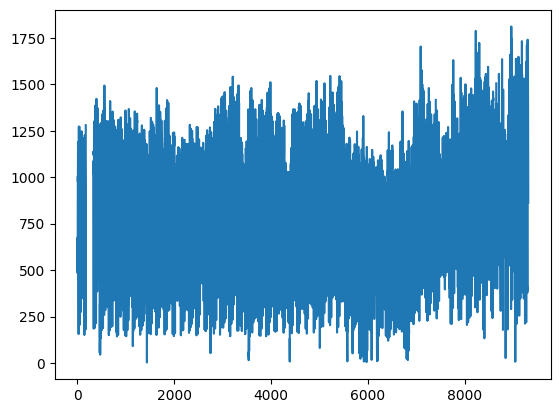

In [623]:
plt.plot(list(range(9314)), champs["Débit horaire"])